In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

data = sns.load_dataset('tips')

raw = data.copy()

Data Preprocessing

In [ ]:
raw

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
raw['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [ ]:
dummies = pd.get_dummies(raw['day'])
dummies

,Thur,Fri,Sat,Sun
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
239,0,0,1,0
240,0,0,1,0
241,0,0,1,0
242,0,0,1,0


In [ ]:
raw = raw.join(dummies)
raw

,total_bill,tip,sex,smoker,day,time,size,Thur,Fri,Sat,Sun
0,16.99,1.01,Female,No,Sun,Dinner,2,0,0,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0,0,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,0,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,0,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0,0,1,0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0,0,1,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0,0,1,0
242,17.82,1.75,Male,No,Sat,Dinner,2,0,0,1,0


In [ ]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
 7   Thur        244 non-null    uint8   
 8   Fri         244 non-null    uint8   
 9   Sat         244 non-null    uint8   
 10  Sun         244 non-null    uint8   
dtypes: category(4), float64(2), int64(1), uint8(4)
memory usage: 8.3 KB


In [ ]:
raw.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00
Thur,244.0,0.254098,0.436248,0.00,0.0000,0.000,1.0000,1.00
Fri,244.0,0.077869,0.268516,0.00,0.0000,0.000,0.0000,1.00
Sat,244.0,0.356557,0.479967,0.00,0.0000,0.000,1.0000,1.00
Sun,244.0,0.311475,0.464049,0.00,0.0000,0.000,1.0000,1.00


In [ ]:
df = raw[['total_bill', 'tip']]
nans = df.isna().sum()
finite = np.isfinite(df)

print(len(df))
print(nans.sum())
print(finite.sum())





244
0
total_bill    244
tip           244
dtype: int64


In [ ]:
from sklearn.preprocessing import power_transform

df = pd.DataFrame(power_transform(df, method='box-cox'), columns=['total_bill', 'tip'])


In [ ]:
def z_score(data):
  threshold = 3
  mean = np.mean(data)
  std = np.std(data)

  outlier = []
  for i in data:
    z = (i-mean)/std
    if z > threshold:
      outlier.append(i)
      
  return outlier

In [ ]:
print(z_score(df['total_bill']))
print(z_score(df['tip']))

[]
[]


Exploratory Data Analysis


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif["features"] = df.columns

vif.round(1)

,VIF Factor,features
0,1.9,total_bill
1,1.9,tip


In [ ]:
raw = raw[['tip', 'total_bill', 'Sat', 'Fri', 'Sun', 'Thur']]

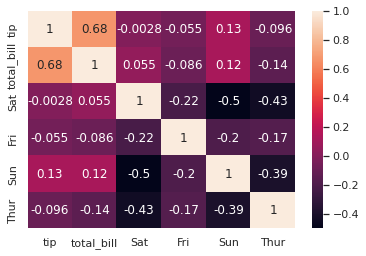

In [ ]:
sns.heatmap(raw.corr(), annot=True)

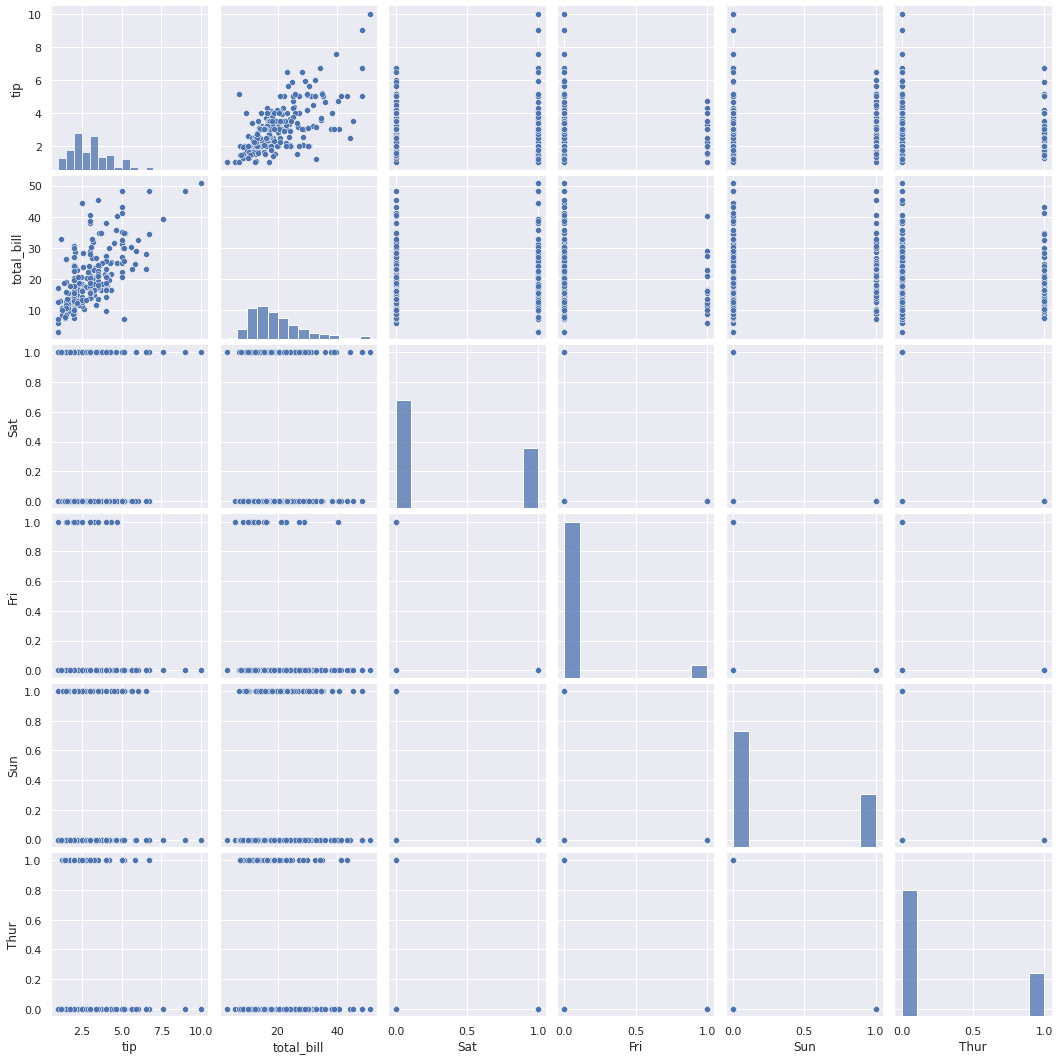

In [ ]:
sns.pairplot(raw)

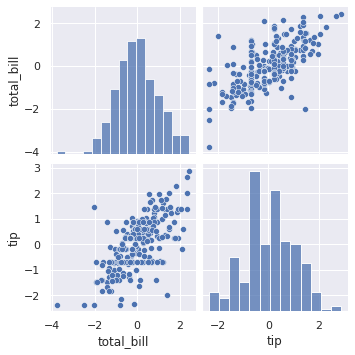

In [ ]:
sns.pairplot(df)

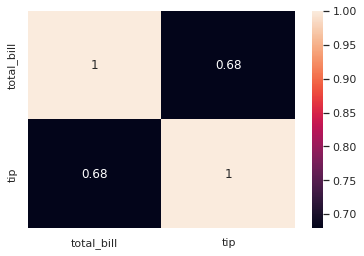

In [ ]:
sns.heatmap(df.corr(), annot=True)

Model

In [ ]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df['total_bill'], df['tip'], train_size=0.7)

In [ ]:
X_test = sm.add_constant(X_test, prepend=False)
model = sm.OLS(Y_test, X_test)

result = model.fit()
result.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     116.7
Date:                Sat, 15 Oct 2022   Prob (F-statistic):           1.03e-16
Time:                        15:32:03   Log-Likelihood:                -78.825
No. Observations:                  74   AIC:                             161.7
Df Residuals:                      72   BIC:                             166.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
total_bill     0.8667      0.080     10.801      0.000       0.707       1.027
const          0.1305      0.083      1.572      0.120      -0.035       0.296
==============================================================================
Omnibus:                       12.761   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.738
Skew:                          -0.894   Prob(JB):                      0.00104
Kurtosis:                       4.120   Cond. No.                         1.09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
y_pred = result.predict(X_test)

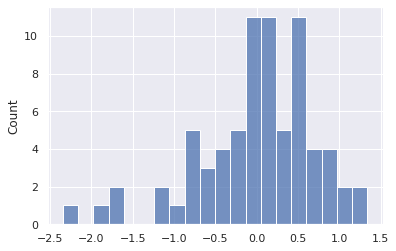

In [ ]:
resid = result.resid
sns.histplot(resid, bins=20)

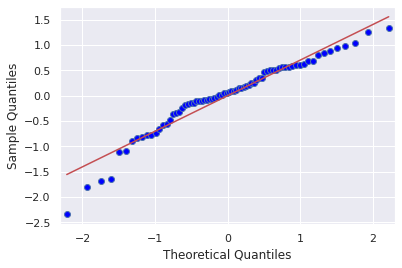

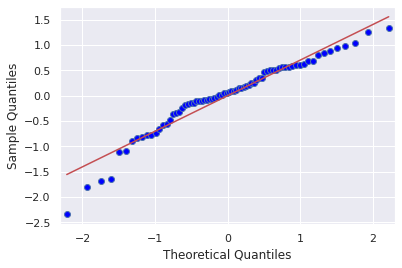

In [ ]:
import statsmodels.api as sm
sm.qqplot(result.resid,line='s')

In [ ]:
from scipy import stats
shapiro_test = stats.shapiro(result.resid)
shapiro_test

#H0: Próba pochodzi z populacji o rozkładzie normalnym
#H1: Próba nie pochodzi z populacji o rozkładzie normalnym.


ShapiroResult(statistic=0.9489443898200989, pvalue=0.004708505235612392)